In [1]:
#%matplotlib notebook

# Onderzoeksrapport

**Studenten:** Dennis Gerritsen, Tim Dremmen

**Studentnummers:** 2106973, 1859609

**Docent:** Koen Steeghs

**Course:** Data Science

**Klas:** BD04

## Introductie

Dit onderzoeksrapport dient als groeirapport voor de studenten om aan te kunnen tonen dat ze de
vaardigheden bezitten die tijdens de course van de studenten gevraagd worden. Aan de hand van verschillende
verschillende data science methoden wordt de kennis toegepast op een zelfgekozen dataset.

## Materialen

Voor dit rapport wordt gebruik gemaakt van verschillende python libraries. Onder andere
pandas voor het opzetten van een dataframe en het manipuleren van data. Numpy voor de uitgebreide array functies.
Ook sklearn om de verschillende modellen te kunnen opzetten. En matplotlib om de grafieken te kunnen plotten.

[dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## Onderzoek

In dit hoofdstuk zijn de uitwerkingen te vinden met algemene informatie per methode en
welke aanpassingen gemaakt moeten worden om het model per methode op te kunnen stellen. Ook is
 er een conclusie verbonden aan de uitgewerkte modellen.

#### Setup

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")


path = Path("data/houses.csv")

df = pd.read_csv(path)

### Dataset

De gekozen dataset is een huizenverkoop dataset met allerlei relevante informatie te vinden in het bestand data_description.txt. Het voornamelijke doel
van de dataset is op basis van de  81 verschillende kolommen de huizenprijs te voorspellen, buiten dit zijn er natuurlijk een aantal verbanden te vinden die mogelijk in dit
document te voorschijn komen. Hieronder is een overzicht te zien van een de kolommen in de dataset.

In [3]:
pd.set_option('max_columns', None)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Preprocessing

Hierin wordt beschreving welke operaties over de dataset worden uitgevoerd voordat we er mee gaan werken.

#### NaN values

Voor alle kolommen in de dataset die een lege waarde bevatten, betekent het dat dit attribuut er niet is. Dus ontbreekt er geen data
en betekent het dat er geen operatie over de NaN waardes hoeft worden uitgevoerd.

In [4]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


#### Categorische waardes

Per methode wordt gekeken of het nodig is om classificaties numeriek of om er een boolean van te maken. Deze omvormingen zijn hier beschreven.

#### Central Air Conditioning

(Logaritmic invullen!)

### Multiple Linear Regression

Multiple linear regression is een uitbreiding op de methode linear regression waarbij de uitkomst afhankelijk is van niet een
onafhankelijke variabele, maar meerderen. Een voorbeeld voor het berekenen van multiple linear regression is de tevredenheid van mensen.
Dit is een resultaat dat niet af te leiden valt uit een variabele, en zijn er meerdere invoervariabelen nodig om het resultaat te bepalen.
Een belangrijke eigenschap bij het toepassen van lineaire regressie, is dat de x en y variabelen goed met elkaar moeten correleren, en ook
een lineair patroon moeten hebben wanneer ze geplot worden, anders is het model niet vertrouwbaar genoeg.

### Hypothese

In onze uitwerking gaan we op basis van het woonoppervlakte en de garagegrootte de prijs voorspellen van een huis. Wij denken dat het
oppervlakte een sterke correlatie heeft met de uiteindelijke prijs van het huis in combinatie met de grootte van de garage mits die aanwezig is.

#### Preparatie

Bij linear regression is het belangrijk dat de waardes correleren met het resultaat, in dit geval is dat de huizenprijs.
Als onafhankelijke variabelen hebben we gekozen voor GrLivArea en GarageArea, aangezien we daar een duidelijke correlatie zien
en zijn de waardes in de kolommen niet opgedeeld in groepen, maar zien we dat de waardes meer natuurlijk op de grafiek terecht komen.

In [12]:
mlrdf = df
mlrdf.corrwith(mlrdf['SalePrice'])

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float

In [13]:
mlrdf['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Wat meteen uit de dataset te concluderen valt, is dat er ook huizen zijn met een garage grootte van 0, dit betekent dat er geen garage is. Dus
worden deze waardes er direct uitgehaald, aangezien deze records niks kunnen zeggen over de huizenprijs op basis van de garagegrootte.
Ook is te zien dat het verband vanaf een prijs van 400000 niet echt duidelijk meer loopt, dus is er besloten om alle records van 400000 en hoger
te droppen om hierdoor dus een beter model te maken. Overigens is het ook waar te nemen dat er een aantal uitschieters zijn op de GrLivArea en GarageArea kolommen deze zijn hierbij dus ook eruit gefilterd.


<AxesSubplot:ylabel='Density'>

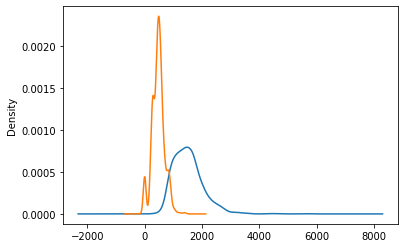

In [6]:
x1 = mlrdf['GrLivArea']
x2 = mlrdf['GarageArea']
y = mlrdf['SalePrice']

x1.plot.kde()
x2.plot.kde()

Bovenstaand in het blauwe plot is een mooie verdeling te zien van het leefoppervlakte (GrLivArea) en is deze dus goed te gebruiken. Wat natuurlijk opvalt
is de verdeling van de garagegrootte (GarageArea) deze loopt niet soepel. Het eerste punt is links waarbij die bij de 0 oploopt en dan daalt. Dit is te verklaren dat alle huizen
met een garagegrootte van 0 dus geen garage hebben en alle garages een bepaalde grootte moeten hebben om te kunnen functioneren als garage, dit punt is te zien bij de stijging. De andere punten zijn voornamelijk
clusters van veelgebruikte garagegroottes, ondanks dit niet de meest nette verdeling is, denken wij dat het prima is om deze kolom mee te nemen in onze model, omdat dit in de praktijk immers ook kan voorkomen.


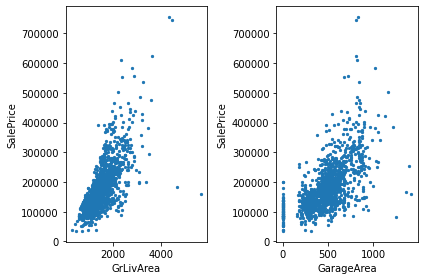

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(x1, y, s=5)
ax1.set(xlabel='GrLivArea', ylabel='SalePrice')

ax2.scatter(x2, y, s=5)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
ax2.set(xlabel='GarageArea', ylabel='SalePrice')
fig.tight_layout()
plt.show()

De data wordt op basis van de eerder benoemde waarnemingen gefiltreerd. En hierdoor is er nu een duidelijk lineair verband waar te nemen.


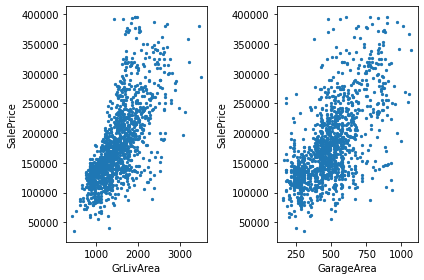

In [8]:
mlrdf = mlrdf[mlrdf.SalePrice < 400000]
mlrdf = mlrdf[mlrdf.GarageArea > 0]
mlrdf = mlrdf[mlrdf.GarageArea < 1100]
mlrdf = mlrdf[mlrdf.GrLivArea < 4000]


x1 = mlrdf['GrLivArea']
x2 = mlrdf['GarageArea']
y = mlrdf['SalePrice']

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(x1, y, s=5)
ax1.set(xlabel='GrLivArea', ylabel='SalePrice')

ax2.scatter(x2, y, s=5)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
ax2.set(xlabel='GarageArea', ylabel='SalePrice')
fig.tight_layout()
plt.show()

#### Modelleren

Op basis van de huidige waardes kan nu een model worden opgesteld en is een r2 score van
0,60 af te lezen.

In [9]:
# Assign X and Y axis
X = mlrdf[['GarageArea', 'GrLivArea']]
y = mlrdf['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Coefficient:")
print(regressor.coef_)
print("Intercept")
print(regressor.intercept_)
print("R2")
print(r2_score(y_test, y_pred))

Coefficient:
[139.37139979  66.95627868]
Intercept
8242.242665726022
R2
0.591085154065552


#### Visualiseren

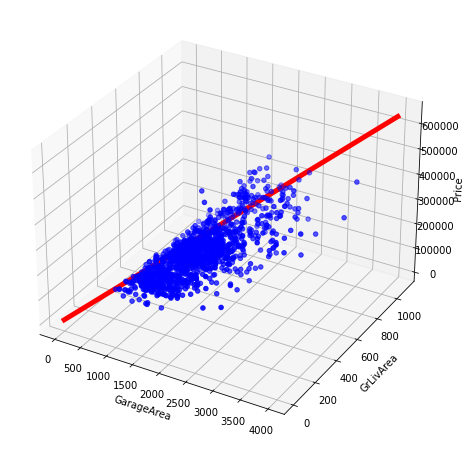

In [10]:
maxGrLivArea = 4000
maxGarageArea = 1100

y_predLineStart = [[0, 0]]
y_predLineEnd = [[4000, 1100]]
yStart = regressor.predict(y_predLineStart)
yEnd = regressor.predict(y_predLineEnd)

x1Plot = [0,4000]
x2Plot = [0, 1100]
yPlot = np.array([yStart, yEnd]).flatten().tolist()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o')
ax.plot3D(x1Plot, x2Plot, yPlot, color='red', linewidth=5)
# set your labels
ax.set_xlabel('GarageArea')
ax.set_ylabel('GrLivArea')
ax.set_zlabel('Price')
plt.show()


#### Conclusie

### Logaritmic Regression

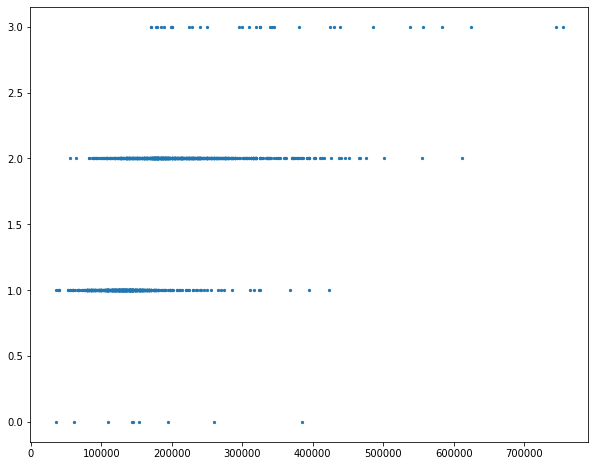

In [11]:
lgdf = df
fig = plt.figure(figsize=(10, 8))
y3 = lgdf['FullBath']
x3 = lgdf['SalePrice']

plt.scatter(x3, y3, s=5)

plt.show()

### Decision Trees

### Random Forests

## Discussie

## Conclusie

## Aanbevelingen

## Literatuurlijst